In [32]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
import seaborn as sns
import statsmodels.api as sm

## Load The Data

In [26]:
df = pd.read_csv("diabetes.csv")

In [27]:
df

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


Optimization terminated successfully.
         Current function value: 0.174904
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                 4303
Model:                          Logit   Df Residuals:                     4288
Method:                           MLE   Df Model:                           14
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.7148
Time:                        11:23:02   Log-Likelihood:                -752.61
converged:                       True   LL-Null:                       -2638.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.7750      1.078    -20.208      0.000     -23.887     -19.663
Age            0.0705      0.

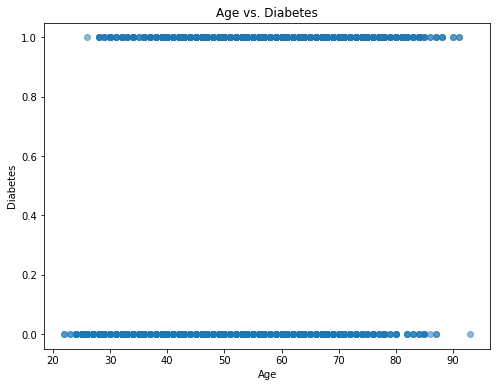

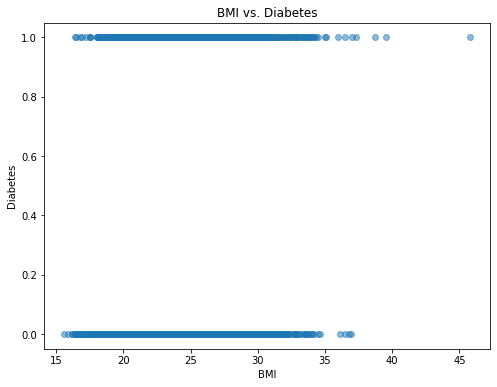

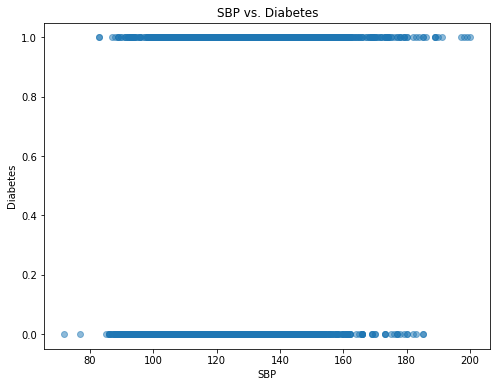

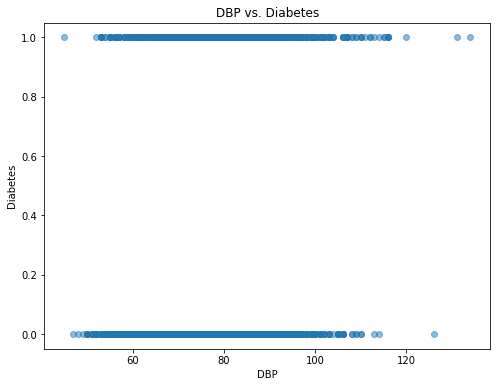

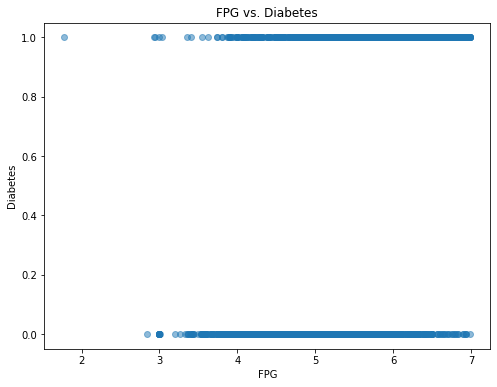

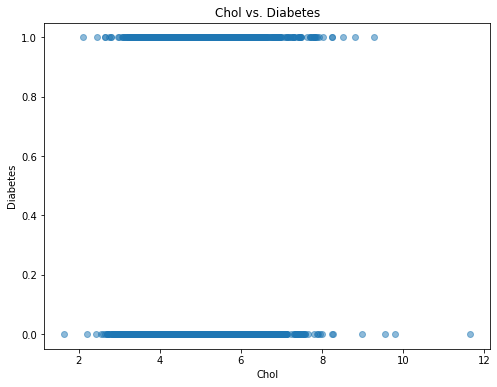

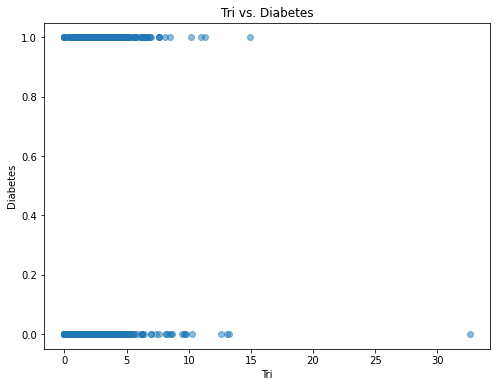

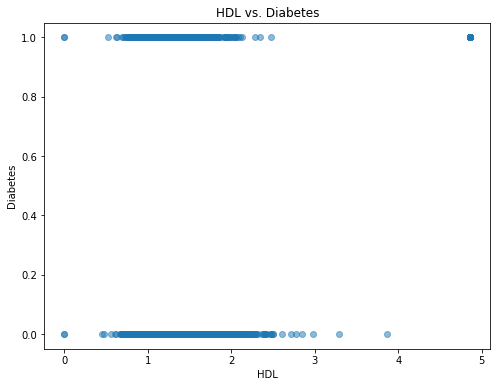

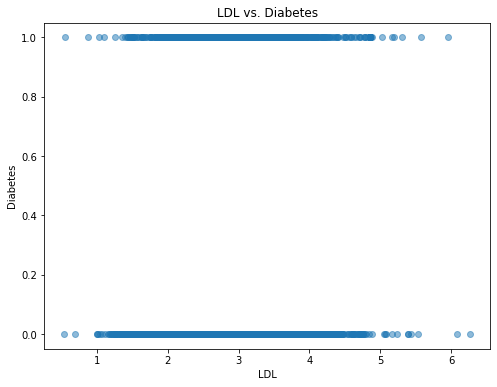

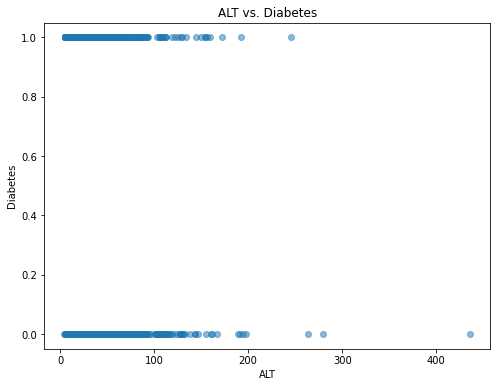

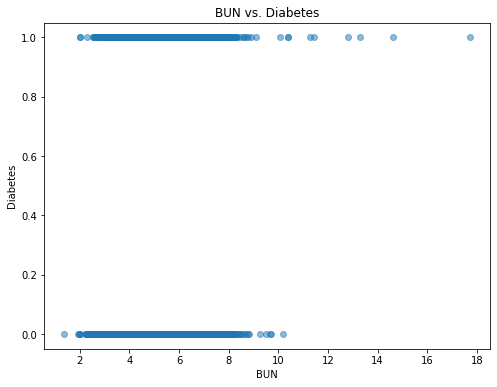

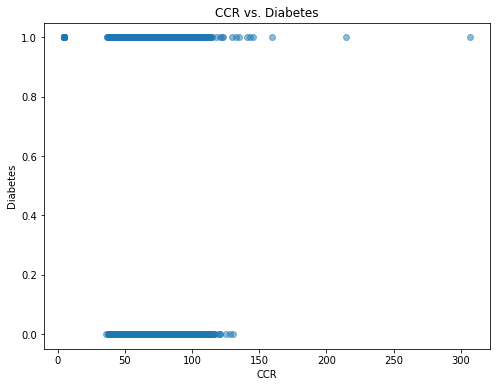

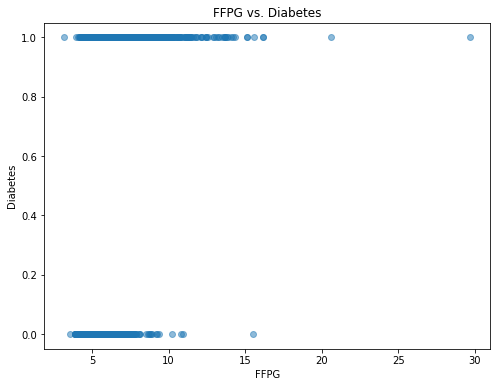

In [37]:
target_variable = 'Diabetes'
categorical_variables = ["Gender", "smoking", "drinking", "family_histroy"]
all_variables = ['Age', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking']
# Add constant term for the intercept
X = sm.add_constant(df[all_variables])
y = df[target_variable]

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()
# Get summary of the model
print(result.summary())

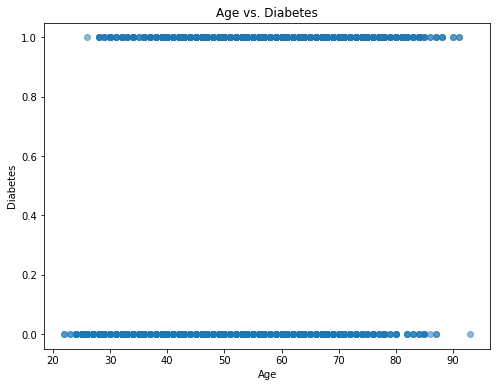

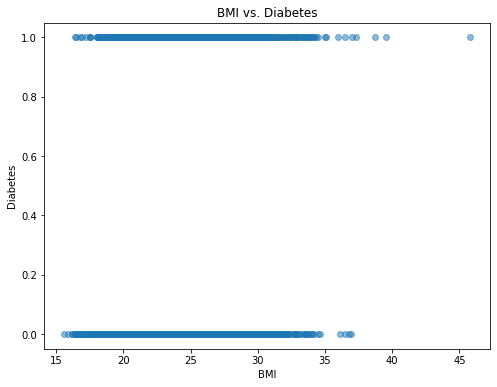

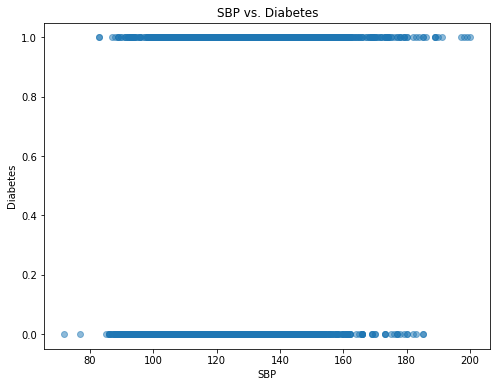

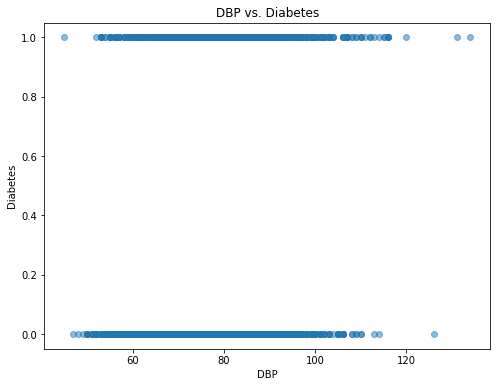

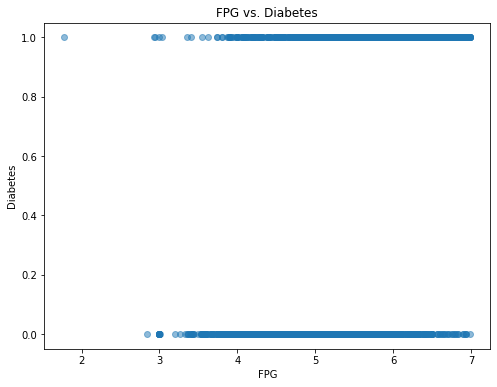

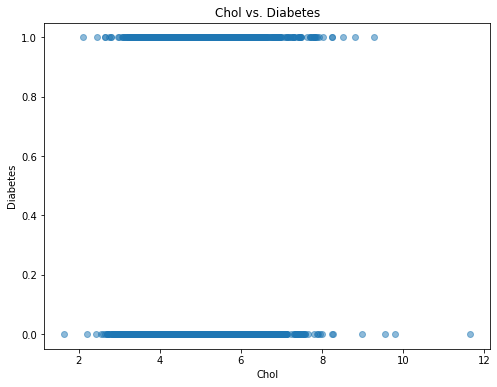

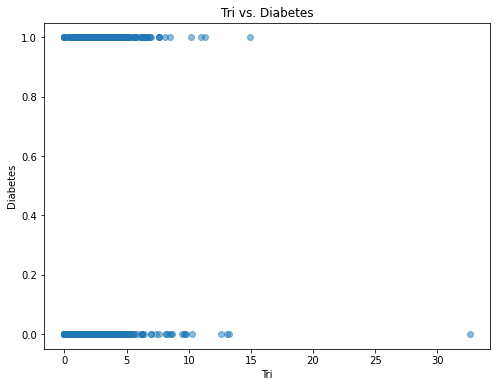

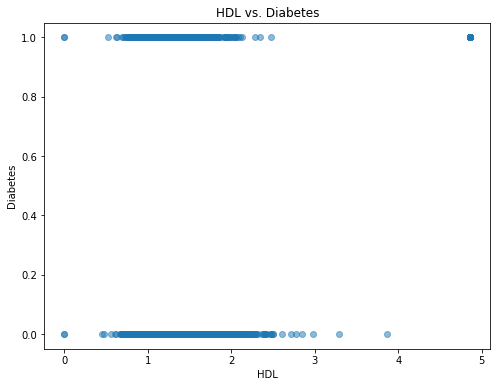

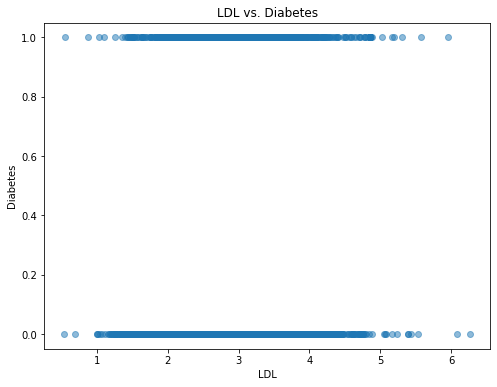

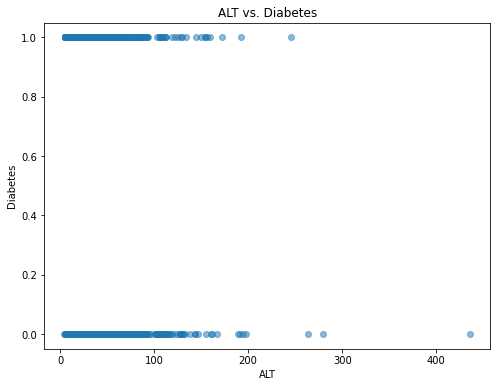

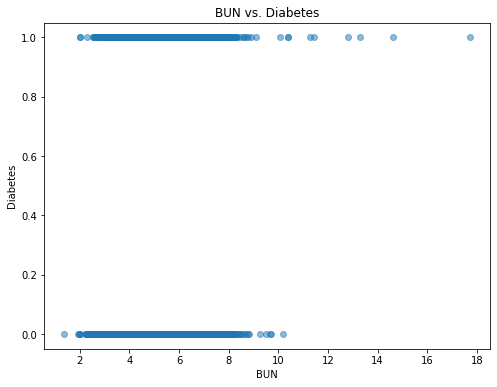

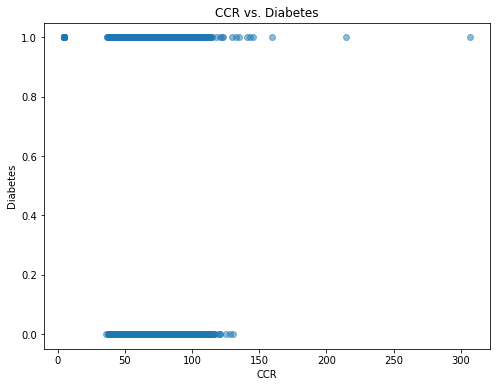

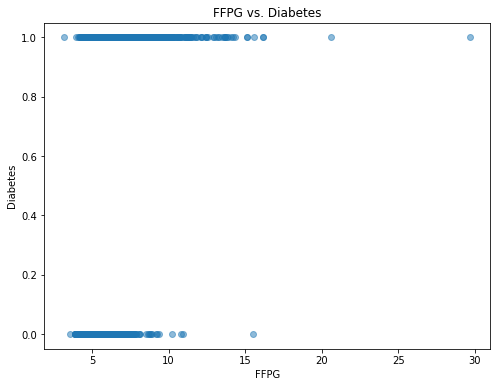

In [38]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Exclude the target variable from the scatterplot
    if column != target_variable and column not in categorical_variables:
        # Create a scatterplot for the current column against the target variable
        plt.figure(figsize=(8, 6)) 
        plt.scatter(df[column], df[target_variable], alpha=0.5)
        plt.title(f'{column} vs. {target_variable}')
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.show()  # Display the scatterplot

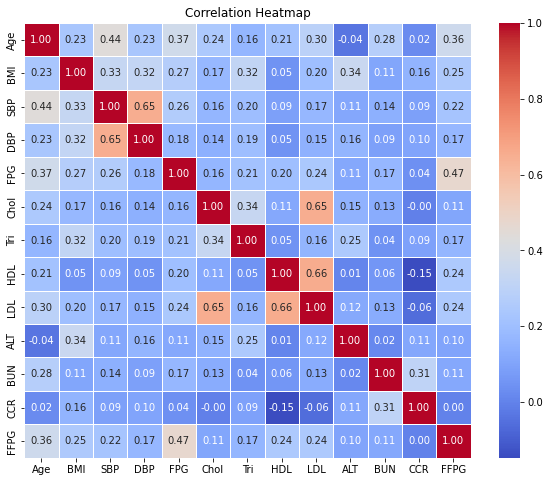

In [29]:
# Drop the target variable and categorical variables from the DataFrame
df_numeric = df.drop(columns=[target_variable] + categorical_variables)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

AttributeError: 'list' object has no attribute 'contains'

In [ ]:
# Standardize input variables
df.experience = (df.experience - df.experience.mean()) / df.experience.std()
df.salary = (df.salary - df.salary.mean()) / df.salary.std()